In [5]:
from boolean_networks.steady_state import get_steady_state
from boolean_networks import utils, canalizing
from boolean_networks.gene_network import GeneNetwork
import matplotlib.pyplot as plt
from boolean_networks.MFPT import swap_MFPT, calculate_gamma
from boolean_networks.bn import BooleanNetwork

import numpy as np
from numpy import genfromtxt
import math, random, pickle, pandas, openpyxl

In [4]:
file = open("bns_10.obj",  "rb")
bns = pickle.load(file)
print(bns)
file.close()
f_vars = np.array([[0, 1, 2],[0, 1, 2],[1, 2, -1]])
funcs = np.array([[0, 0, 0],
                  [1, 1, 0],
                  [1, 1, 0],
                  [1, 1, 1],
                  [1, 0, 0],
                  [1, 0, 0],
                  [1, 0, 0],
                  [1, 0, 1]])
    
transition = np.genfromtxt('C:/Git/boolean_networks/src/resources/transition_matrix2.csv', delimiter=',')
for i in range(0, 1024):
    print(sum(transition[i]))

n_genes = 10
perturbation = 0.01
n_predictors = 3
n_random = 10
n_time = 10
geneNetwork = GeneNetwork(n_genes, perturbation, None, None, transition)
steadyStatesVector = geneNetwork.get_steady_state()

generate_transition(n_genes, [0,1,2], [0, 1, 2], 0.1)

n_random = 100
n_time = 15
D = geneNetwork.get_random_observations(n_random, n_time)

n_master = 3
master_genes = list(range(n_master))
slave_genes = list(range(n_master, n_genes))
print("Master genes" + str(master_genes))
print("Slave genes" + str(slave_genes))
RP = np.zeros((n_random, n_time, n_master))
IP = np.zeros((n_random, n_time, n_master))
CP = np.zeros((n_random, n_time, n_master))

for i in range(n_random):
    for j in range(n_time):
        RP[i, j,] = geneNetwork.get_reg_power(master_genes, slave_genes, n_predictors, D[i, j,])
        IP[i, j,] = geneNetwork.get_incap_power(master_genes, slave_genes, n_predictors, D[i, j,])
        CP[i, j,] = RP[i, j] + IP[i, j,]

print(CP)

FileNotFoundError: [Errno 2] No such file or directory: 'bns_10.obj'

In [ ]:

n_genes = 10
booleanNetwork = generate_bn(n_genes, [1,2])
geneNetwork = GeneNetwork(n_genes, 0.01, boolean_vars, boolean_funcs)
print(geneNetwork.transition_matrix)
print(geneNetwork.get_steady_state())
# print(geneNetwork.get_canalizing_power(range(2), range(2), 1, geneNetwork.get_steady_state()))

In [ ]:
import networkx as nx

n_genes = 3
bn_vars = np.array([[0, 1, 2],[0, 1, 2], [1, 2, -1]])
bn_funcs = np.array([[0, 0, 0],
                      [1, 1, 0],
                      [1, 1, 0],
                      [1, 1, 1],
                      [1, 0, 0],
                      [1, 0, 0],
                      [1, 0, 0],
                      [1, 0, 1]])
bn = BooleanNetwork(n_genes, bn_vars, bn_funcs)
# bn = bns[277]
G = nx.DiGraph()
# bn_vars = minimize_bf_parameters(bn)
bn_vars = bn.f_vars

edges = [(g2, g1) for g1 in range(bn.n_genes) for g2 in bn_vars[g1] if g2 > -1]

G.add_edges_from(edges)

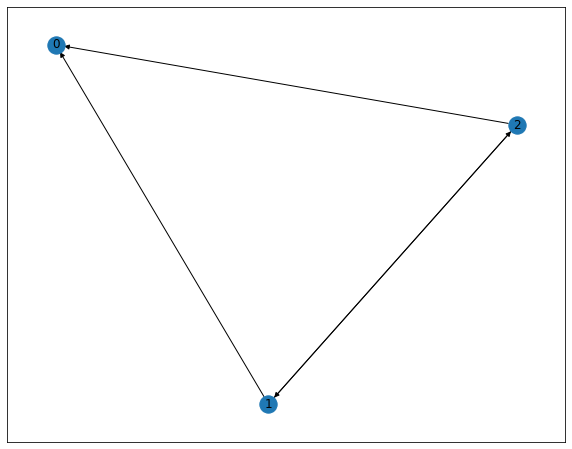

defaultdict(<class 'list'>, {1: [0, 2], 2: [0, 1]})
[2, 1]
{1: True, 2: True} {0: True, 2: True, 1: True}


/home/elia/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/elia/.local/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [28]:
import networkx as nx
import itertools
from structures import calculate_powers_with_all_combinations, filterGenes, calculate_powers_with_filtered_genes
from dfsAlgorithm import Graph, convertToNeighboursArray

n_genes = 3
predictors = 1
# bn_vars = np.array([[ 1, -1, -1],
#     [ 5,  8, -1],
#     [ 0,  6,  7],
#     [ 0,  7,  9],
#     [ 1, -1, -1],
#     [ 5,  6, -1],
#     [ 1,  3,  6],
#     [ 0,  1, -1],
#     [ 5,  6, -1],
#     [ 5, -1, -1]])
# bn_funcs = np.array([[ 0,  0,  0,  0,  0,  1,  1,  0,  0,  0],
#     [ 1,  1,  1,  0,  1,  1,  0,  1,  1,  1],
#     [-1,  1,  0,  1, -1,  1,  1,  0,  1, -1],
#     [-1,  1,  1,  1, -1,  0,  1,  0,  1, -1],
#     [-1, -1,  0,  1, -1, -1,  1, -1, -1, -1],
#     [-1, -1,  0,  1, -1, -1,  0, -1, -1, -1],
#     [-1, -1,  0,  0, -1, -1,  0, -1, -1, -1],
#     [-1, -1,  1,  1, -1, -1,  0, -1, -1, -1]])

# f_vars3 = np.array([[2], [2], [1]])
# funcs3 = np.array([[0, 0, 1], [1, 1, 0]])

f_vars3 = np.array([[1, 2], [2, -1], [1, -1]])
funcs3 = np.array([[0, 0, 1], [1, 1, 0], [1, -1, -1], [1, -1, -1]])

#f_vars4 = np.array([[0, 3], [3, -1], [1, 2], [0, -1]])
#funcs4 = np.array([[1, 0, 0, 0],
        # [0, 1, 0, 1],
        # [0, -1, 0, -1],
        # [0, -1, 1, -1]])

bn = BooleanNetwork(n_genes, f_vars3, funcs3)

G = nx.DiGraph()
edges = [(g2, g1) for g1 in range(bn.n_genes) for g2 in f_vars3[g1] if g2 > -1]
G.add_edges_from(edges)
fig = plt.figure(figsize=(10,8))
nx.draw_networkx(G, with_labels=True)
plt.show()

# filter genes by master and slave
g = Graph(len(f_vars3))
g.graph = convertToNeighboursArray(f_vars3)
print(g.graph)
cycles = g.SCC()
net = GeneNetwork(bn.n_genes, 0.01, bn.f_vars, bn.funcs)
masterGenesDict, slaveGenesDict = filterGenes(g.graph, net, cycles)
print(masterGenesDict, slaveGenesDict)

calculate_powers_with_filtered_genes(masterGenesDict, slaveGenesDict, net, predictors)

In [14]:
f_vars = np.array([[1, 2], [2], [1]], dtype=object)
transition = np.array([[0, 0.98, 0.009801, 0.000099, 0.009801, 0.000099, 0.000099, 0.000001],
              [0.009801, 0, 0.000099, 0.009801, 0.000099, 0.009801, 0.000001, 0.97],
              [0.009801, 0.000099, 0, 0.009801, 0.97, 0.000001, 0.009801, 0.000099],
              [0.000099, 0.009801, 0.009801, 0, 0.000001, 0.000099, 0.97, 0.009801],
              [0.009801, 0.97, 0.000099, 0.000001, 0, 0.009801, 0.009801, 0.000099],
              [0.000099, 0.009801, 0.000001, 0.000099, 0.009801, 0, 0.000099, 0.98],
              [0.000099, 0.000001, 0.009801, 0.000099, 0.98, 0.000099, 0, 0.009801],
              [0.000001, 0.000099, 0.000099, 0.009801, 0.000099, 0.009801, 0.98, 0]])
net = GeneNetwork(3, 0.01, f_vars, transition=transition)
print(net.get_steady_state())

[0.00483537 0.24271507 0.00259259 0.00483559 0.24517406 0.00721278
 0.24742594 0.24520861]


[('000', '001'), ('001', '111'), ('010', '000'), ('011', '110'), ('100', '001'), ('101', '111'), ('110', '000'), ('111', '110')]


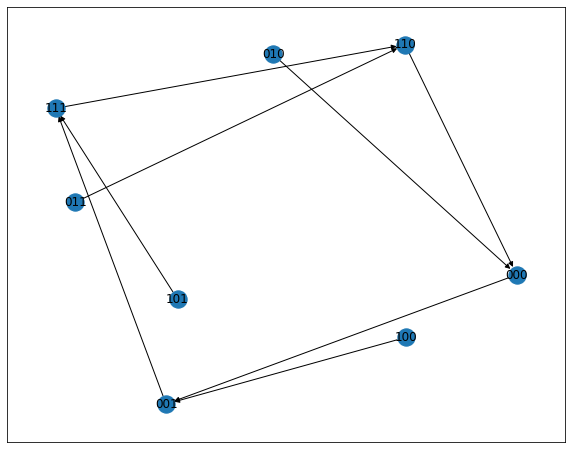

[{"state": 0, "level": 0, "attractor": 0, "target": 1}, {"state": 1, "level": 0, "attractor": 0, "target": 7}, {"state": 2, "level": 1, "attractor": 0, "target": 0}, {"state": 3, "level": 1, "attractor": 0, "target": 6}, {"state": 4, "level": 1, "attractor": 0, "target": 1}, {"state": 5, "level": 1, "attractor": 0, "target": 7}, {"state": 6, "level": 0, "attractor": 0, "target": 0}, {"state": 7, "level": 0, "attractor": 0, "target": 6}]


In [28]:
from utils import get_next_state, dec_to_bin 

G = nx.DiGraph()
edges = [(dec_to_bin(g1, bn.n_genes), get_next_state(dec_to_bin(g1, bn.n_genes), bn.f_vars, bn.funcs)) for g1 in range(net.n_states)]
print(edges)
G.add_edges_from(edges)
fig = plt.figure(figsize=(10,8))
nx.draw_networkx(G, with_labels=True)
plt.show()

print(net.export_to_json())

[(1, 0), (2, 0), (2, 1), (1, 2)]
[[ 1  2]
 [ 2 -1]
 [ 1 -1]]
[[ 0  1  0]
 [ 1  0  1]
 [ 1 -1 -1]
 [ 0 -1 -1]]


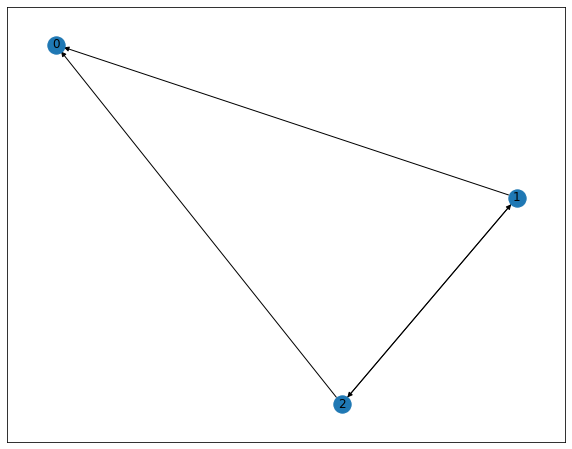

In [102]:
import networkx as nx
from boolean_networks.bn import generate_bn

# generate one random bn
n_genes = 3
random_fvars = [2, 1, 1]
random_bn = generate_bn(n_genes, random_fvars)

G = nx.DiGraph()
edges = [(g2, g1) for g1 in range(random_bn.n_genes) for g2 in random_bn.f_vars[g1] if g2 > -1]
print(edges)
print(random_bn.f_vars)
print(random_bn.funcs)
G.add_edges_from(edges)
fig = plt.figure(figsize=(10,8))

nx.draw_networkx(G, with_labels=True)
plt.show()

In [15]:
net = GeneNetwork(random_bn.n_genes, 0.01, random_bn.f_vars, random_bn.funcs)
print("Regulation power: ")
print(net.get_reg_power([0,2], [1], 1, net.get_steady_state()))
print("Incapacitating power: ")
print(net.get_incap_power([0,2], [1], 1, net.get_steady_state()))
print("Canalizing power: ")
print(net.get_canalizing_power([0,2], [1], 1, net.get_steady_state()))
print(random_bn.f_vars)
print(random_bn.funcs)
print(net.transition_matrix)

Regulation power: 
[0. 0.]
Incapacitating power: 
[0. 0.]
Canalizing power: 
[0. 0.]
[[ 0  3]
 [ 3 -1]
 [ 1  2]
 [ 0 -1]]
[[ 1  0  0  0]
 [ 0  1  0  1]
 [ 0 -1  0 -1]
 [ 0 -1  1 -1]]
[[0.0000000e+00 9.7029900e-03 9.7029900e-03 9.8010000e-05 9.7029900e-03
  9.8010000e-05 9.8010000e-05 9.9000000e-07 9.7029900e-01 9.8010000e-05
  9.8010000e-05 9.9000000e-07 9.8010000e-05 9.9000000e-07 9.9000000e-07
  1.0000000e-08]
 [9.7029900e-03 0.0000000e+00 9.8010000e-05 9.7029900e-03 9.6069402e-01
  9.7029900e-03 9.9000000e-07 9.8010000e-05 9.8010000e-05 9.7029900e-03
  9.9000000e-07 9.8010000e-05 9.9000000e-07 9.8010000e-05 1.0000000e-08
  9.9000000e-07]
 [9.7029900e-03 9.8010000e-05 0.0000000e+00 9.7029900e-03 9.8010000e-05
  9.9000000e-07 9.7029900e-03 9.8010000e-05 9.6069402e-01 9.9000000e-07
  9.7029900e-03 9.8010000e-05 9.9000000e-07 1.0000000e-08 9.8010000e-05
  9.9000000e-07]
 [9.8010000e-05 9.7029900e-03 9.7029900e-03 0.0000000e+00 9.6059700e-01
  9.8010000e-05 9.8010000e-05 9.7029900e-03 9.

[(1, 2, 3, 4), (1, 2, 4, 3), (1, 3, 2, 4), (1, 3, 4, 2), (1, 4, 2, 3), (1, 4, 3, 2), (2, 1, 3, 4), (2, 1, 4, 3), (2, 3, 1, 4), (2, 3, 4, 1), (2, 4, 1, 3), (2, 4, 3, 1), (3, 1, 2, 4), (3, 1, 4, 2), (3, 2, 1, 4), (3, 2, 4, 1), (3, 4, 1, 2), (3, 4, 2, 1), (4, 1, 2, 3), (4, 1, 3, 2), (4, 2, 1, 3), (4, 2, 3, 1), (4, 3, 1, 2), (4, 3, 2, 1), (1, 1, 1, 1), (1, 1, 1, 2), (1, 1, 1, 3), (1, 1, 1, 4), (1, 1, 2, 2), (1, 1, 2, 3), (1, 1, 2, 4), (1, 1, 3, 3), (1, 1, 3, 4), (1, 1, 4, 4), (1, 2, 2, 2), (1, 2, 2, 3), (1, 2, 2, 4), (1, 2, 3, 3), (1, 2, 3, 4), (1, 2, 4, 4), (1, 3, 3, 3), (1, 3, 3, 4), (1, 3, 4, 4), (1, 4, 4, 4), (2, 2, 2, 2), (2, 2, 2, 3), (2, 2, 2, 4), (2, 2, 3, 3), (2, 2, 3, 4), (2, 2, 4, 4), (2, 3, 3, 3), (2, 3, 3, 4), (2, 3, 4, 4), (2, 4, 4, 4), (3, 3, 3, 3), (3, 3, 3, 4), (3, 3, 4, 4), (3, 4, 4, 4), (4, 4, 4, 4)]


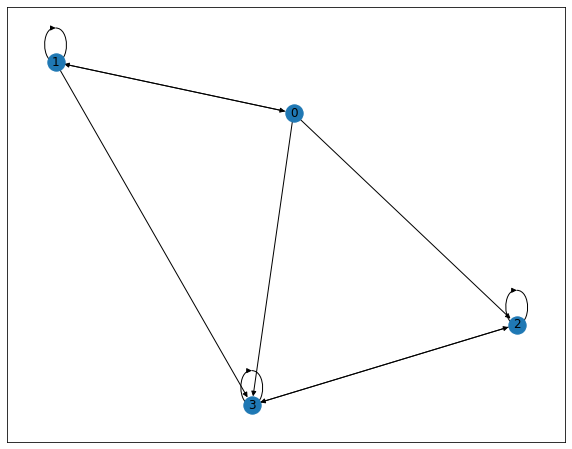

[[ 1 -1 -1 -1]
 [ 0  1 -1 -1]
 [ 0  2  3 -1]
 [ 0  1  2  3]]
[[ 0  0  1  0]
 [ 1  1  1  0]
 [-1  1  0  0]
 [-1  1  1  0]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  0]
 [-1 -1  0  0]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]]


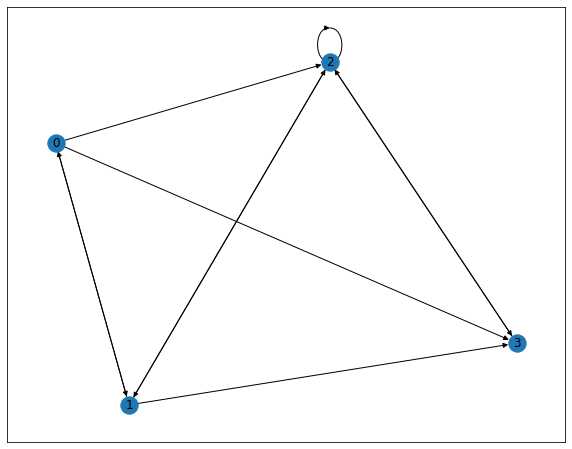

[[ 1 -1 -1 -1]
 [ 0  2 -1 -1]
 [ 0  1  2  3]
 [ 0  1  2 -1]]
[[ 0  1  1  1]
 [ 1  0  1  1]
 [-1  0  0  0]
 [-1  0  0  1]
 [-1 -1  1  0]
 [-1 -1  0  1]
 [-1 -1  1  1]
 [-1 -1  0  0]
 [-1 -1  1 -1]
 [-1 -1  0 -1]
 [-1 -1  1 -1]
 [-1 -1  0 -1]
 [-1 -1  0 -1]
 [-1 -1  1 -1]
 [-1 -1  0 -1]
 [-1 -1  1 -1]]


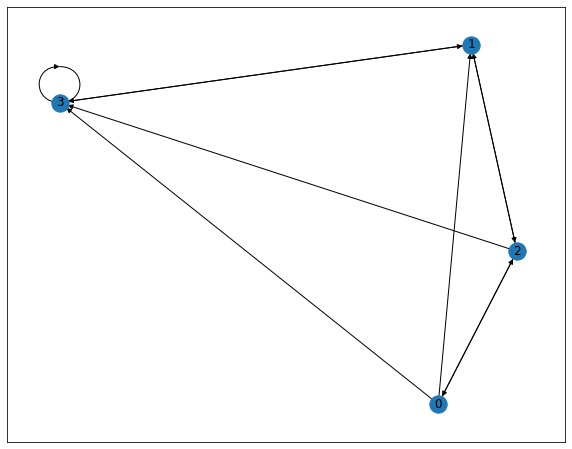

[[ 2 -1 -1 -1]
 [ 0  2  3 -1]
 [ 0  1 -1 -1]
 [ 0  1  2  3]]
[[ 1  1  1  0]
 [ 0  0  0  1]
 [-1  1  1  0]
 [-1  0  1  1]
 [-1  0 -1  0]
 [-1  1 -1  1]
 [-1  0 -1  0]
 [-1  0 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]]


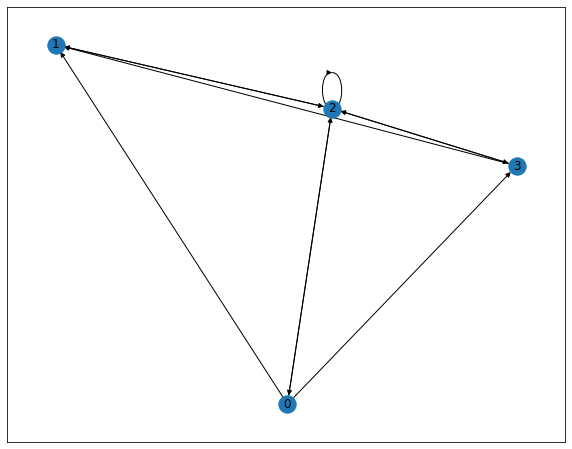

[[ 2 -1 -1 -1]
 [ 0  2  3 -1]
 [ 0  1  2  3]
 [ 0  2 -1 -1]]
[[ 0  0  0  0]
 [ 1  1  0  0]
 [-1  1  1  0]
 [-1  0  1  1]
 [-1  1  0 -1]
 [-1  0  0 -1]
 [-1  0  0 -1]
 [-1  0  0 -1]
 [-1 -1  0 -1]
 [-1 -1  0 -1]
 [-1 -1  0 -1]
 [-1 -1  1 -1]
 [-1 -1  0 -1]
 [-1 -1  1 -1]
 [-1 -1  1 -1]
 [-1 -1  1 -1]]


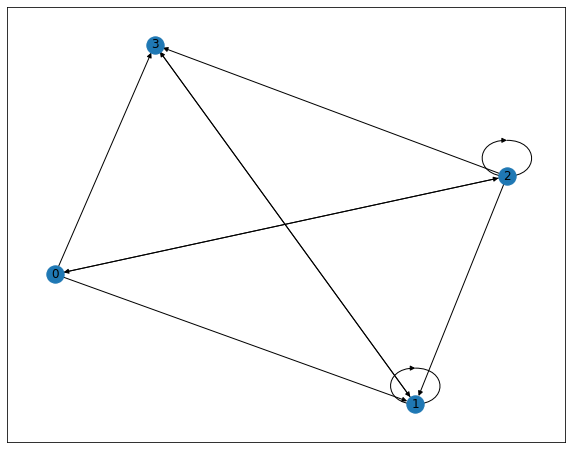

[[ 2 -1 -1 -1]
 [ 0  1  2  3]
 [ 0  2 -1 -1]
 [ 0  1  2 -1]]
[[ 1  1  1  1]
 [ 0  0  0  0]
 [-1  0  0  1]
 [-1  1  1  1]
 [-1  0 -1  1]
 [-1  0 -1  1]
 [-1  0 -1  0]
 [-1  1 -1  1]
 [-1  0 -1 -1]
 [-1  1 -1 -1]
 [-1  1 -1 -1]
 [-1  1 -1 -1]
 [-1  1 -1 -1]
 [-1  0 -1 -1]
 [-1  0 -1 -1]
 [-1  1 -1 -1]]


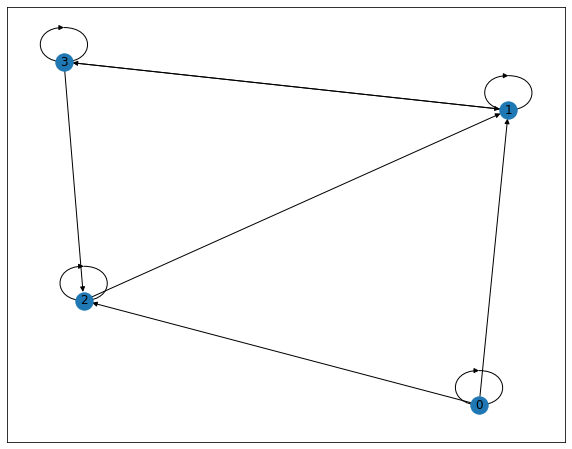

[[ 0 -1 -1 -1]
 [ 0  1  2  3]
 [ 0  2  3 -1]
 [ 1  3 -1 -1]]
[[ 1  1  1  0]
 [ 0  1  1  0]
 [-1  1  1  0]
 [-1  0  0  1]
 [-1  0  1 -1]
 [-1  0  1 -1]
 [-1  0  1 -1]
 [-1  1  1 -1]
 [-1  0 -1 -1]
 [-1  0 -1 -1]
 [-1  1 -1 -1]
 [-1  0 -1 -1]
 [-1  1 -1 -1]
 [-1  0 -1 -1]
 [-1  1 -1 -1]
 [-1  1 -1 -1]]


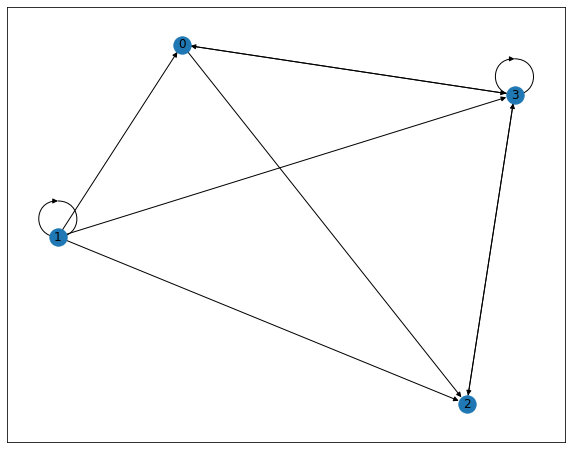

[[ 1  3 -1 -1]
 [ 1 -1 -1 -1]
 [ 0  1  3 -1]
 [ 0  1  2  3]]
[[ 1  1  0  0]
 [ 1  0  0  1]
 [ 1 -1  0  1]
 [ 0 -1  1  0]
 [-1 -1  1  1]
 [-1 -1  0  0]
 [-1 -1  1  0]
 [-1 -1  1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]]


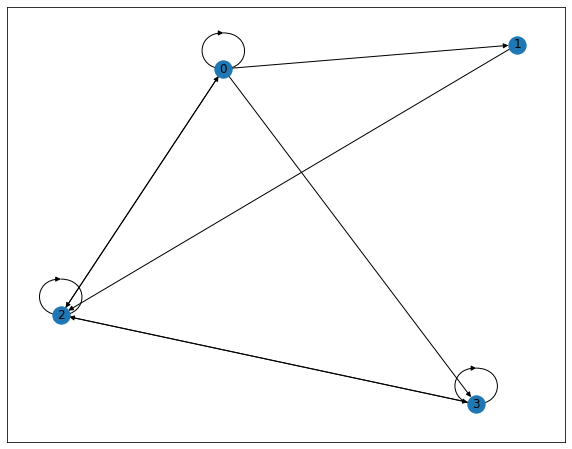

[[ 0  2 -1 -1]
 [ 0 -1 -1 -1]
 [ 0  1  2  3]
 [ 0  2  3 -1]]
[[ 1  1  0  0]
 [ 1  0  0  0]
 [ 1 -1  0  0]
 [ 0 -1  1  0]
 [-1 -1  0  0]
 [-1 -1  0  1]
 [-1 -1  1  1]
 [-1 -1  0  0]
 [-1 -1  0 -1]
 [-1 -1  1 -1]
 [-1 -1  1 -1]
 [-1 -1  0 -1]
 [-1 -1  0 -1]
 [-1 -1  1 -1]
 [-1 -1  0 -1]
 [-1 -1  1 -1]]


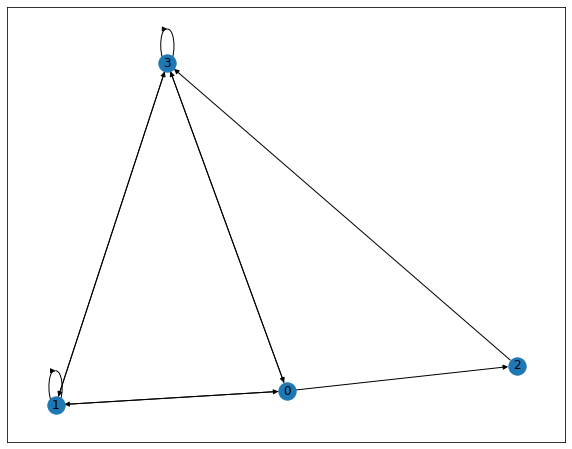

[[ 1  3 -1 -1]
 [ 0  1  3 -1]
 [ 0 -1 -1 -1]
 [ 0  1  2  3]]
[[ 1  1  0  1]
 [ 0  1  1  0]
 [ 1  0 -1  0]
 [ 1  0 -1  0]
 [-1  1 -1  0]
 [-1  1 -1  0]
 [-1  1 -1  1]
 [-1  0 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]]


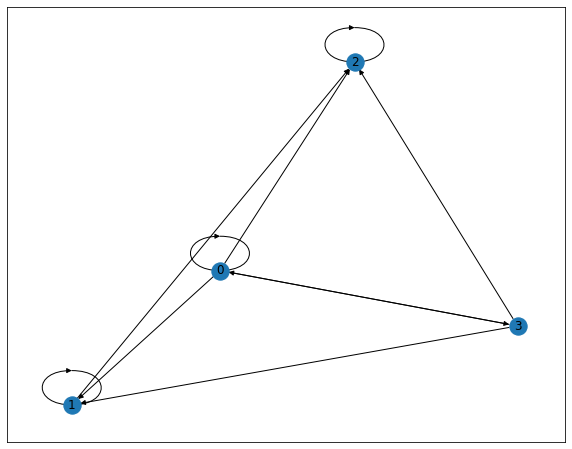

[[ 0  3 -1 -1]
 [ 0  1  3 -1]
 [ 0  1  2  3]
 [ 0 -1 -1 -1]]
[[ 0  0  1  0]
 [ 1  1  0  1]
 [ 1  0  0 -1]
 [ 0  1  1 -1]
 [-1  0  0 -1]
 [-1  1  1 -1]
 [-1  1  1 -1]
 [-1  1  0 -1]
 [-1 -1  0 -1]
 [-1 -1  0 -1]
 [-1 -1  1 -1]
 [-1 -1  1 -1]
 [-1 -1  1 -1]
 [-1 -1  1 -1]
 [-1 -1  1 -1]
 [-1 -1  0 -1]]


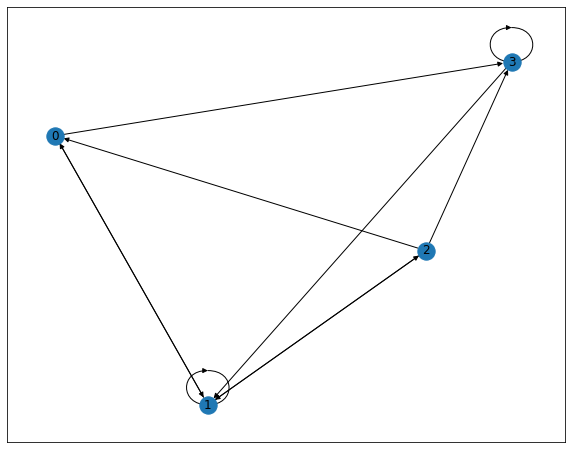

[[ 1  2 -1 -1]
 [ 0  1  2  3]
 [ 1 -1 -1 -1]
 [ 0  2  3 -1]]
[[ 1  1  1  1]
 [ 0  0  0  1]
 [ 1  1 -1  1]
 [ 1  0 -1  0]
 [-1  0 -1  0]
 [-1  0 -1  1]
 [-1  0 -1  1]
 [-1  1 -1  0]
 [-1  0 -1 -1]
 [-1  0 -1 -1]
 [-1  0 -1 -1]
 [-1  1 -1 -1]
 [-1  1 -1 -1]
 [-1  0 -1 -1]
 [-1  0 -1 -1]
 [-1  0 -1 -1]]


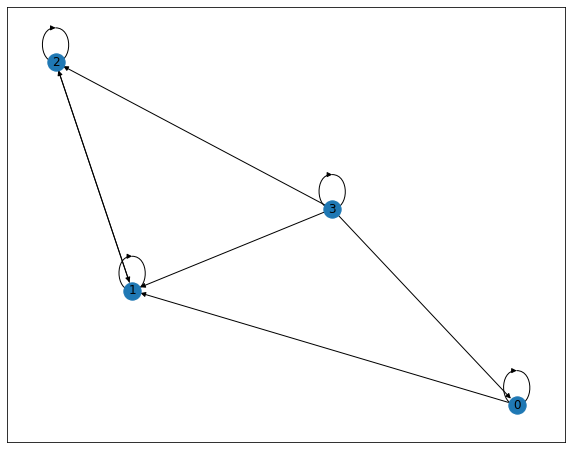

[[ 0  3 -1 -1]
 [ 0  1  2  3]
 [ 1  2  3 -1]
 [ 3 -1 -1 -1]]
[[ 0  1  0  0]
 [ 1  0  0  1]
 [ 0  1  0 -1]
 [ 0  1  1 -1]
 [-1  0  0 -1]
 [-1  1  1 -1]
 [-1  0  1 -1]
 [-1  1  1 -1]
 [-1  1 -1 -1]
 [-1  0 -1 -1]
 [-1  0 -1 -1]
 [-1  1 -1 -1]
 [-1  1 -1 -1]
 [-1  0 -1 -1]
 [-1  0 -1 -1]
 [-1  1 -1 -1]]


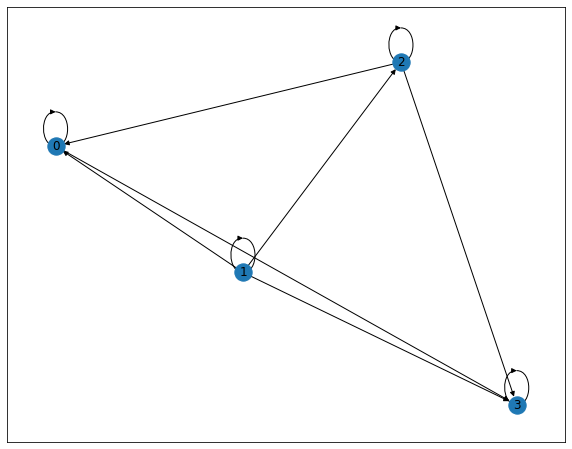

[[ 0  1  2 -1]
 [ 1 -1 -1 -1]
 [ 1  2 -1 -1]
 [ 0  1  2  3]]
[[ 1  0  0  0]
 [ 0  1  0  1]
 [ 1 -1  1  1]
 [ 1 -1  0  1]
 [ 0 -1 -1  0]
 [ 1 -1 -1  1]
 [ 1 -1 -1  1]
 [ 0 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]]


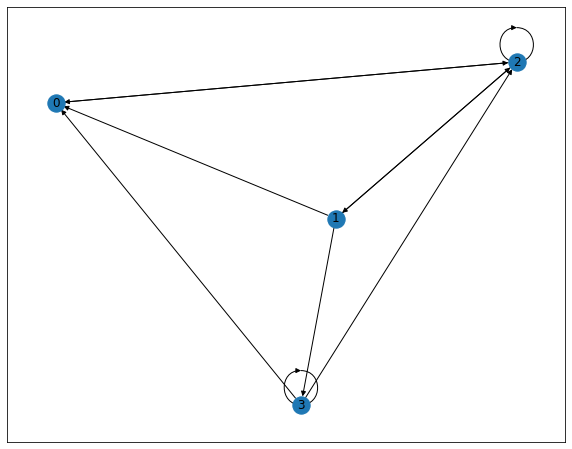

[[ 1  2  3 -1]
 [ 2 -1 -1 -1]
 [ 0  1  2  3]
 [ 1  3 -1 -1]]
[[ 1  1  0  0]
 [ 1  0  1  1]
 [ 0 -1  0  0]
 [ 1 -1  0  0]
 [ 0 -1  0 -1]
 [ 1 -1  1 -1]
 [ 1 -1  1 -1]
 [ 0 -1  0 -1]
 [-1 -1  0 -1]
 [-1 -1  1 -1]
 [-1 -1  0 -1]
 [-1 -1  0 -1]
 [-1 -1  1 -1]
 [-1 -1  0 -1]
 [-1 -1  0 -1]
 [-1 -1  1 -1]]


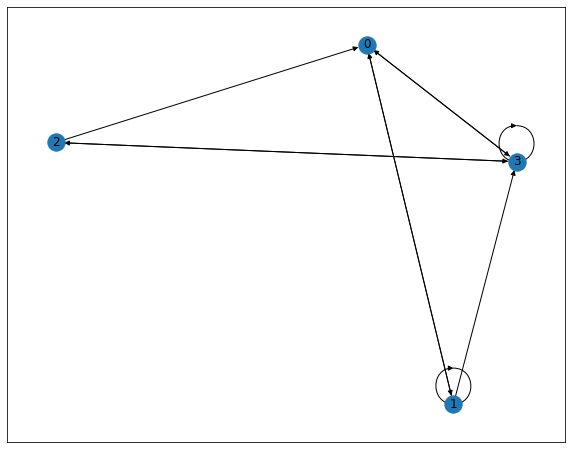

[[ 1  2  3 -1]
 [ 0  1 -1 -1]
 [ 3 -1 -1 -1]
 [ 0  1  2  3]]
[[ 1  1  0  0]
 [ 0  1  1  0]
 [ 1  1 -1  0]
 [ 0  0 -1  0]
 [ 0 -1 -1  1]
 [ 0 -1 -1  1]
 [ 0 -1 -1  0]
 [ 1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  1]]


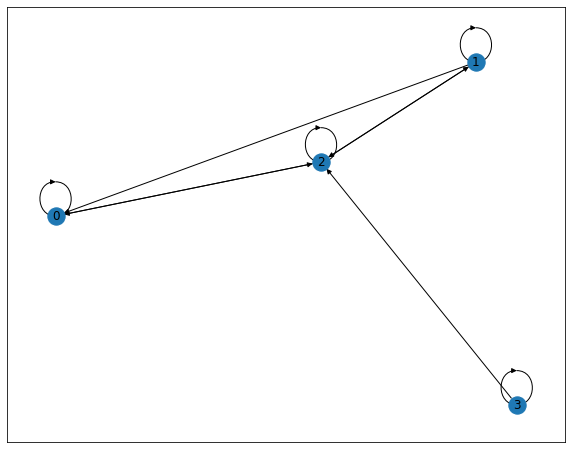

[[ 0  1  2 -1]
 [ 1  2 -1 -1]
 [ 0  1  2  3]
 [ 3 -1 -1 -1]]
[[ 0  0  1  0]
 [ 1  1  0  1]
 [ 1  0  0 -1]
 [ 1  0  1 -1]
 [ 0 -1  0 -1]
 [ 1 -1  0 -1]
 [ 1 -1  0 -1]
 [ 0 -1  1 -1]
 [-1 -1  1 -1]
 [-1 -1  1 -1]
 [-1 -1  0 -1]
 [-1 -1  1 -1]
 [-1 -1  1 -1]
 [-1 -1  1 -1]
 [-1 -1  1 -1]
 [-1 -1  1 -1]]


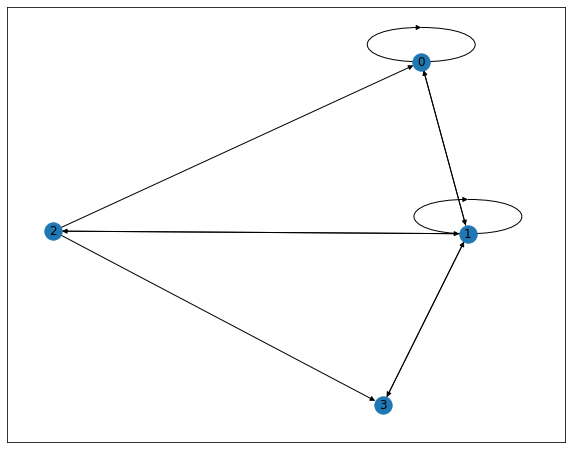

[[ 0  1  2 -1]
 [ 0  1  2  3]
 [ 1 -1 -1 -1]
 [ 1  2 -1 -1]]
[[ 0  0  1  0]
 [ 1  1  0  0]
 [ 1  1 -1  1]
 [ 1  1 -1  0]
 [ 1  0 -1 -1]
 [ 1  0 -1 -1]
 [ 0  0 -1 -1]
 [ 0  0 -1 -1]
 [-1  0 -1 -1]
 [-1  1 -1 -1]
 [-1  1 -1 -1]
 [-1  0 -1 -1]
 [-1  0 -1 -1]
 [-1  0 -1 -1]
 [-1  0 -1 -1]
 [-1  0 -1 -1]]


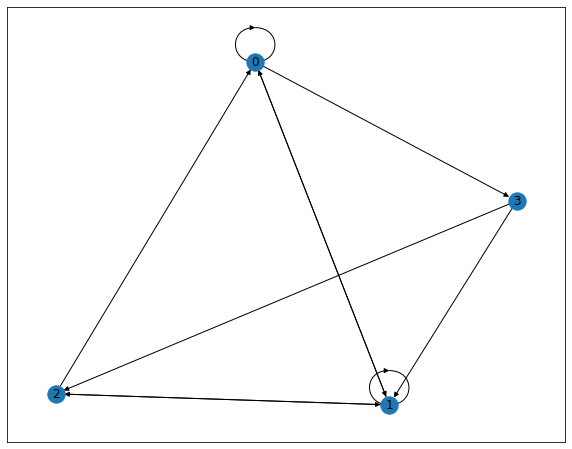

[[ 0  1  2 -1]
 [ 0  1  2  3]
 [ 1  3 -1 -1]
 [ 0 -1 -1 -1]]
[[ 0  0  0  0]
 [ 1  0  1  1]
 [ 1  1  1 -1]
 [ 1  1  0 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 0  0 -1 -1]
 [ 0  1 -1 -1]
 [-1  0 -1 -1]
 [-1  1 -1 -1]
 [-1  1 -1 -1]
 [-1  1 -1 -1]
 [-1  0 -1 -1]
 [-1  1 -1 -1]
 [-1  1 -1 -1]
 [-1  0 -1 -1]]


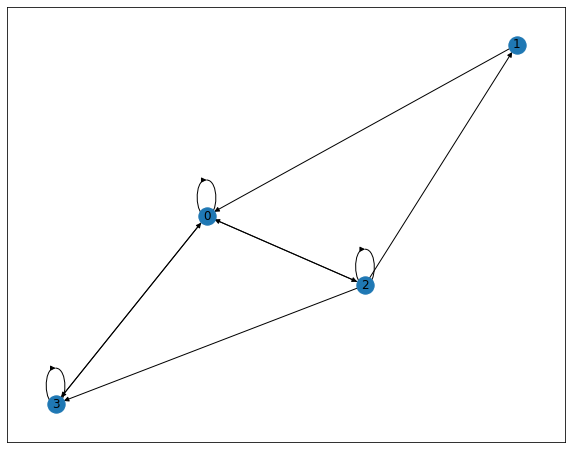

[[ 0  1  2  3]
 [ 2 -1 -1 -1]
 [ 0  2 -1 -1]
 [ 0  2  3 -1]]
[[ 1  1  1  1]
 [ 1  0  0  1]
 [ 0 -1  0  0]
 [ 0 -1  1  0]
 [ 1 -1 -1  0]
 [ 0 -1 -1  1]
 [ 1 -1 -1  1]
 [ 1 -1 -1  1]
 [ 0 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 0 -1 -1 -1]]


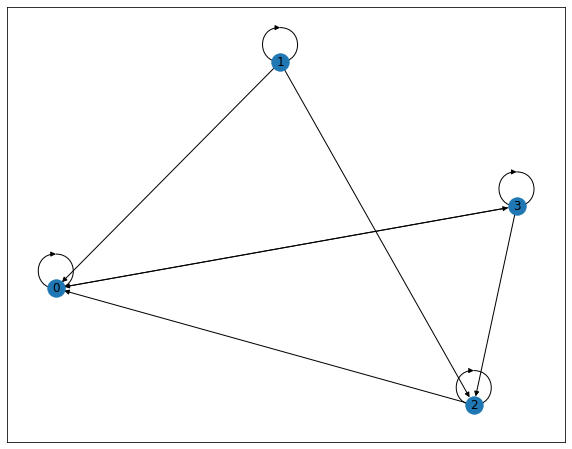

[[ 0  1  2  3]
 [ 1 -1 -1 -1]
 [ 1  2  3 -1]
 [ 0  3 -1 -1]]
[[ 0  1  0  0]
 [ 0  0  1  1]
 [ 0 -1  1  1]
 [ 0 -1  0  0]
 [ 1 -1  0 -1]
 [ 1 -1  0 -1]
 [ 0 -1  1 -1]
 [ 0 -1  1 -1]
 [ 0 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 1 -1 -1 -1]]


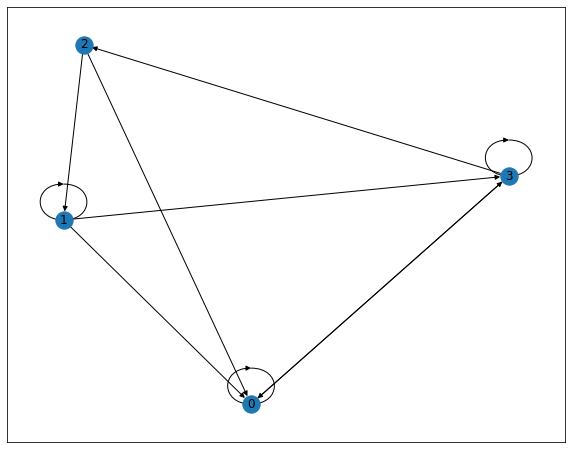

[[ 0  1  2  3]
 [ 1  2 -1 -1]
 [ 3 -1 -1 -1]
 [ 0  1  3 -1]]
[[ 1  1  0  0]
 [ 0  0  1  1]
 [ 0  0 -1  0]
 [ 0  1 -1  0]
 [ 1 -1 -1  0]
 [ 1 -1 -1  0]
 [ 1 -1 -1  1]
 [ 0 -1 -1  0]
 [ 1 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 1 -1 -1 -1]]


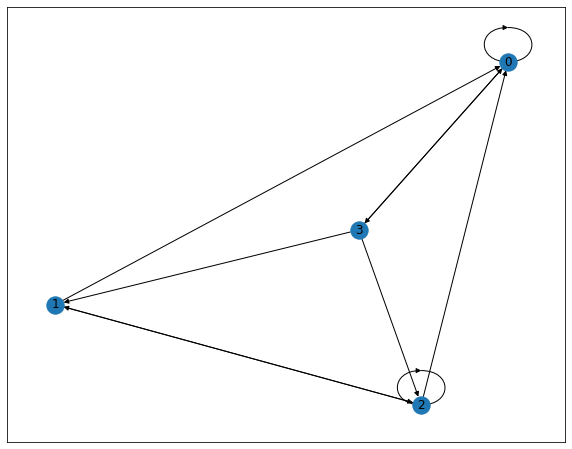

[[ 0  1  2  3]
 [ 2  3 -1 -1]
 [ 1  2  3 -1]
 [ 0 -1 -1 -1]]
[[ 1  1  1  1]
 [ 0  1  1  0]
 [ 1  0  0 -1]
 [ 1  1  1 -1]
 [ 1 -1  1 -1]
 [ 0 -1  1 -1]
 [ 1 -1  1 -1]
 [ 0 -1  0 -1]
 [ 1 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 1 -1 -1 -1]]


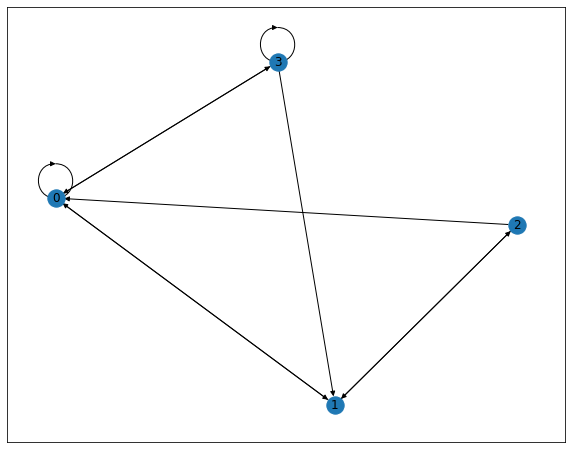

[[ 0  1  2  3]
 [ 0  2  3 -1]
 [ 1 -1 -1 -1]
 [ 0  3 -1 -1]]
[[ 1  0  1  1]
 [ 0  1  0  1]
 [ 1  0 -1  0]
 [ 1  1 -1  1]
 [ 0  0 -1 -1]
 [ 0  0 -1 -1]
 [ 0  0 -1 -1]
 [ 0  1 -1 -1]
 [ 0 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 0 -1 -1 -1]]


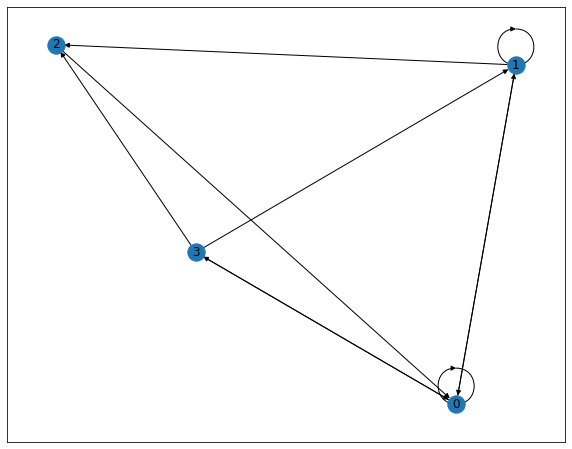

[[ 0  1  2  3]
 [ 0  1  3 -1]
 [ 1  3 -1 -1]
 [ 0 -1 -1 -1]]
[[ 0  0  1  1]
 [ 1  0  0  0]
 [ 0  1  0 -1]
 [ 0  0  1 -1]
 [ 1  1 -1 -1]
 [ 1  0 -1 -1]
 [ 0  0 -1 -1]
 [ 0  1 -1 -1]
 [ 0 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 0 -1 -1 -1]]


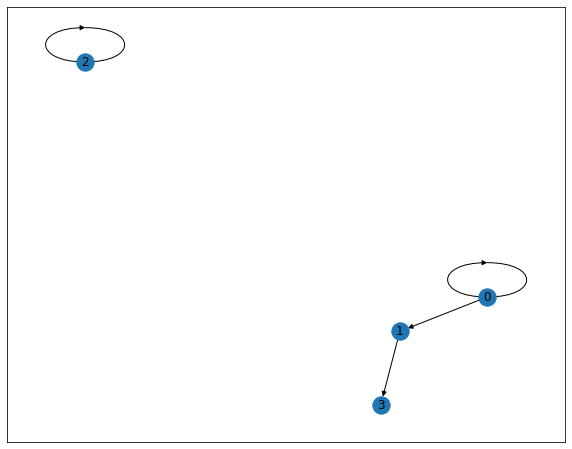

[[0]
 [0]
 [2]
 [1]]
[[1 0 1 1]
 [0 1 0 0]]


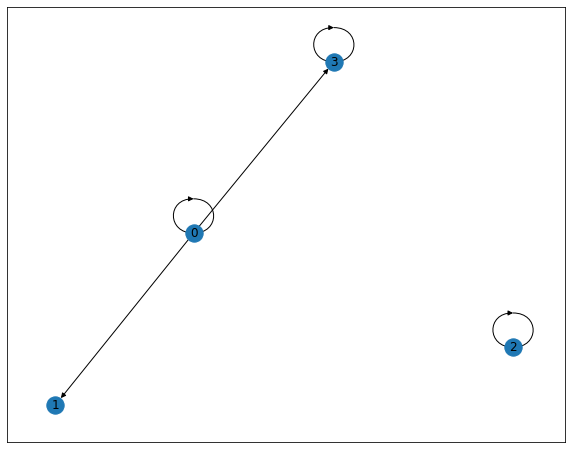

[[ 0 -1]
 [ 0 -1]
 [ 2 -1]
 [ 0  3]]
[[ 0  0  1  0]
 [ 1  1  0  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]]


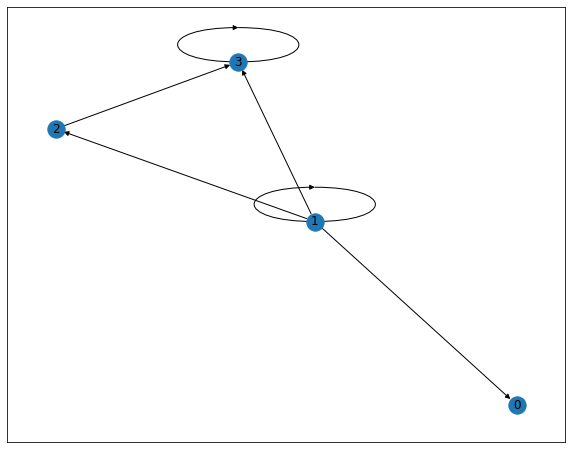

[[ 1 -1 -1]
 [ 1 -1 -1]
 [ 1 -1 -1]
 [ 1  2  3]]
[[ 1  0  0  0]
 [ 0  1  1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]]


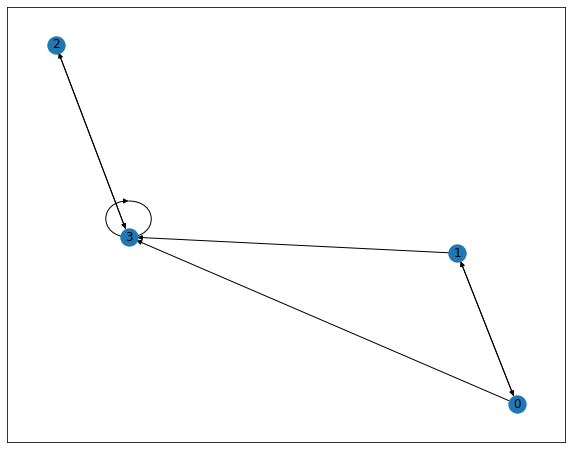

[[ 1 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 3 -1 -1 -1]
 [ 0  1  2  3]]
[[ 1  0  1  1]
 [ 0  1  0  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]]


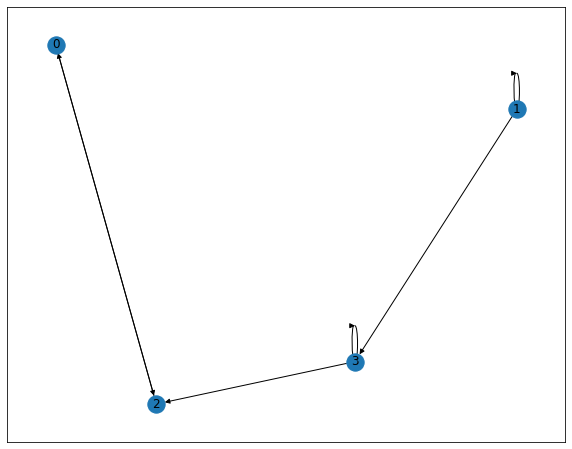

[[ 2 -1]
 [ 1 -1]
 [ 0  3]
 [ 1  3]]
[[ 0  1  1  0]
 [ 1  0  0  1]
 [-1 -1  0  1]
 [-1 -1  1  0]]


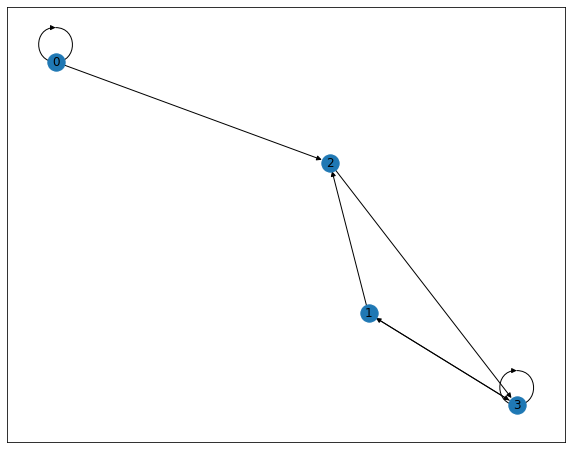

[[ 0 -1 -1]
 [ 3 -1 -1]
 [ 0  1 -1]
 [ 1  2  3]]
[[ 0  1  1  1]
 [ 1  0  1  1]
 [-1 -1  0  1]
 [-1 -1  1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  1]]


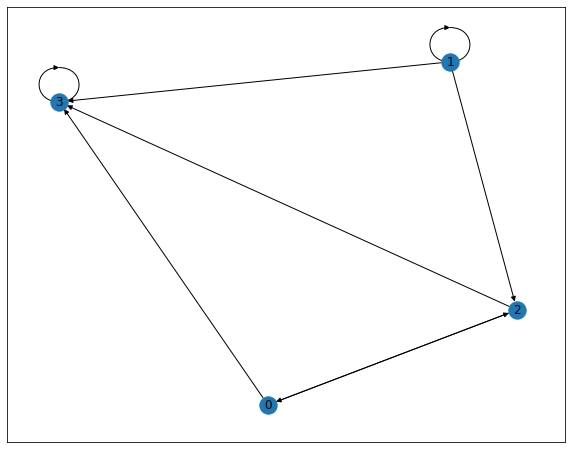

[[ 2 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 0  1 -1 -1]
 [ 0  1  2  3]]
[[ 0  1  1  0]
 [ 1  0  0  0]
 [-1 -1  0  0]
 [-1 -1  1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]]


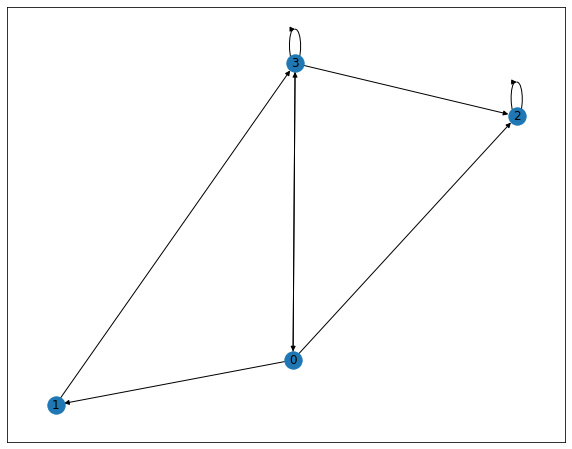

[[ 3 -1 -1]
 [ 0 -1 -1]
 [ 0  2  3]
 [ 0  1  3]]
[[ 0  1  0  0]
 [ 1  0  0  0]
 [-1 -1  0  0]
 [-1 -1  1  0]
 [-1 -1  1  1]
 [-1 -1  1  0]
 [-1 -1  0  0]
 [-1 -1  0  1]]


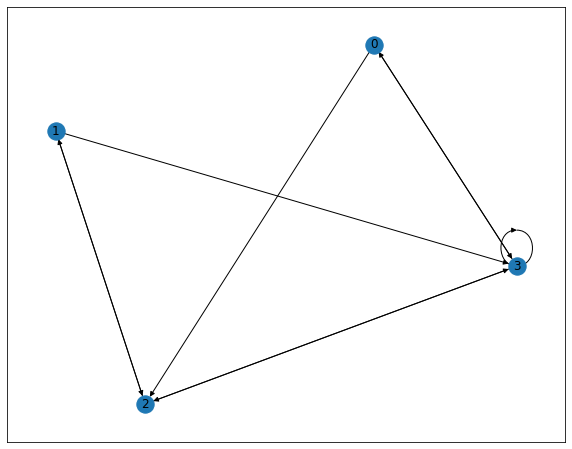

[[ 3 -1 -1 -1]
 [ 2 -1 -1 -1]
 [ 0  1  3 -1]
 [ 0  1  2  3]]
[[ 0  1  1  1]
 [ 1  0  0  1]
 [-1 -1  0  0]
 [-1 -1  0  0]
 [-1 -1  1  0]
 [-1 -1  0  0]
 [-1 -1  0  0]
 [-1 -1  1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]]


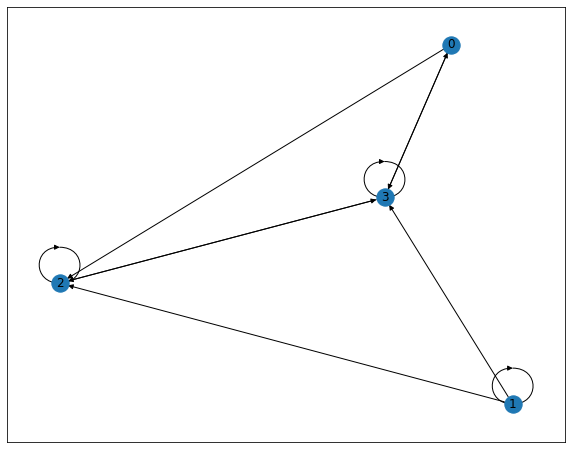

[[ 3 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 0  1  2  3]
 [ 0  1  2  3]]
[[ 0  1  0  1]
 [ 1  0  1  1]
 [-1 -1  0  1]
 [-1 -1  0  1]
 [-1 -1  0  0]
 [-1 -1  0  0]
 [-1 -1  1  0]
 [-1 -1  0  1]
 [-1 -1  1  0]
 [-1 -1  1  1]
 [-1 -1  0  0]
 [-1 -1  1  0]
 [-1 -1  1  1]
 [-1 -1  0  0]
 [-1 -1  0  1]
 [-1 -1  0  1]]


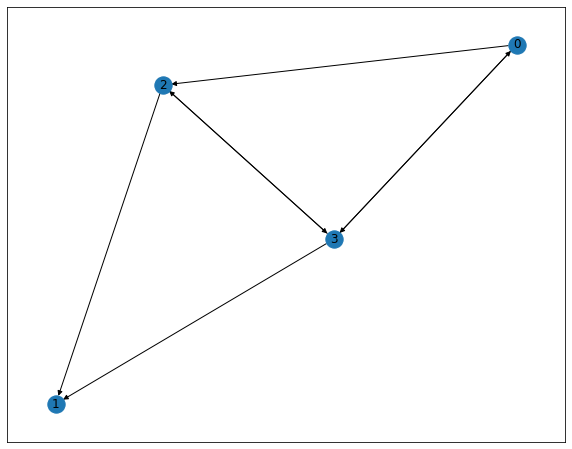

[[ 3 -1]
 [ 2  3]
 [ 0  3]
 [ 0  2]]
[[ 1  0  1  0]
 [ 0  1  1  1]
 [-1  0  0  1]
 [-1  0  1  0]]


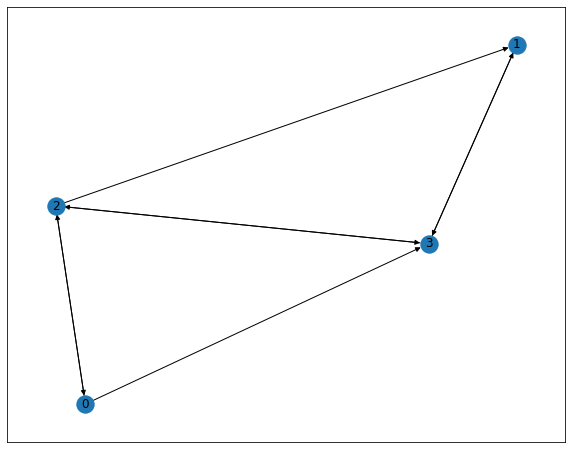

[[ 2 -1 -1]
 [ 2  3 -1]
 [ 0  3 -1]
 [ 0  1  2]]
[[ 1  0  1  0]
 [ 0  1  0  0]
 [-1  0  1  0]
 [-1  0  1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]]


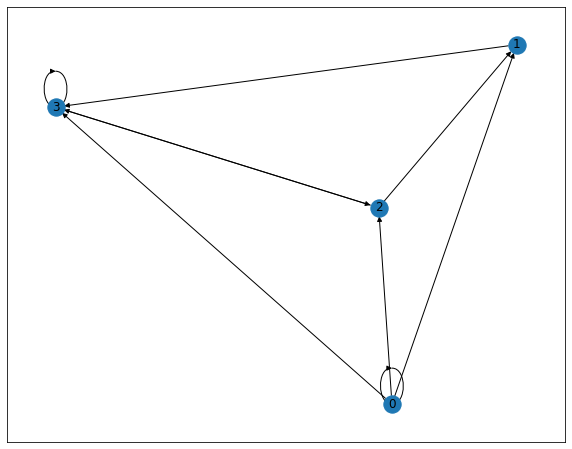

[[ 0 -1 -1 -1]
 [ 0  2 -1 -1]
 [ 0  3 -1 -1]
 [ 0  1  2  3]]
[[ 1  0  0  0]
 [ 0  0  1  0]
 [-1  0  1  0]
 [-1  1  1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]]


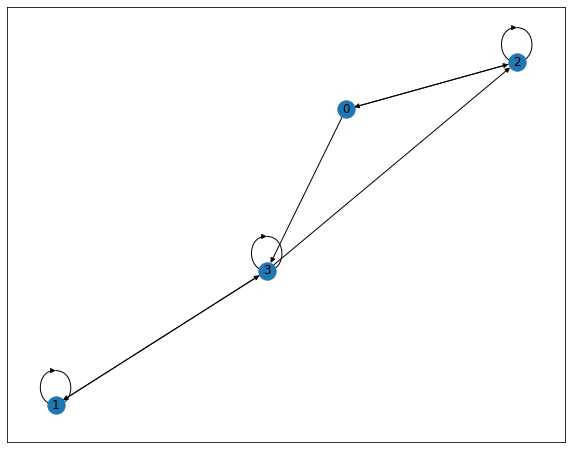

[[ 2 -1 -1]
 [ 1  3 -1]
 [ 0  2  3]
 [ 0  1  3]]
[[ 1  0  0  0]
 [ 0  1  0  1]
 [-1  1  0  0]
 [-1  1  1  1]
 [-1 -1  1  0]
 [-1 -1  0  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


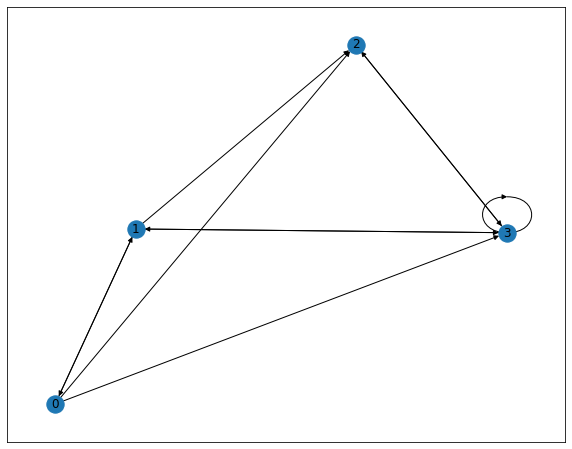

[[ 1 -1 -1 -1]
 [ 0  3 -1 -1]
 [ 0  1  3 -1]
 [ 0  1  2  3]]
[[ 0  1  1  1]
 [ 1  0  0  0]
 [-1  0  0  0]
 [-1  0  0  1]
 [-1 -1  0  0]
 [-1 -1  1  1]
 [-1 -1  0  1]
 [-1 -1  1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  1]]


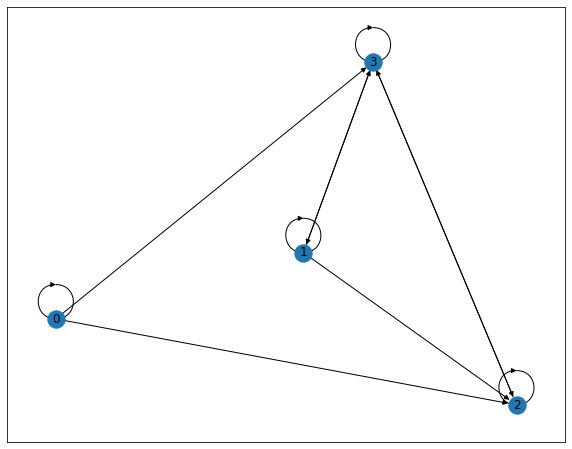

[[ 0 -1 -1 -1]
 [ 1  3 -1 -1]
 [ 0  1  2  3]
 [ 0  1  2  3]]
[[ 1  1  0  0]
 [ 0  1  0  0]
 [-1  1  0  0]
 [-1  0  0  1]
 [-1 -1  0  1]
 [-1 -1  1  0]
 [-1 -1  1  1]
 [-1 -1  1  0]
 [-1 -1  1  0]
 [-1 -1  0  1]
 [-1 -1  0  0]
 [-1 -1  0  1]
 [-1 -1  1  1]
 [-1 -1  0  1]
 [-1 -1  1  1]
 [-1 -1  0  1]]


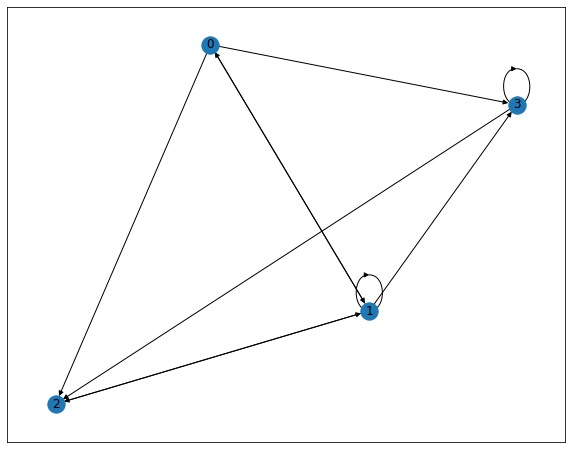

[[ 1 -1 -1]
 [ 0  1  2]
 [ 0  1  3]
 [ 0  1  3]]
[[ 0  0  1  1]
 [ 1  0  1  1]
 [-1  1  0  1]
 [-1  1  0  0]
 [-1  0  1  1]
 [-1  0  1  1]
 [-1  0  1  1]
 [-1  1  0  1]]


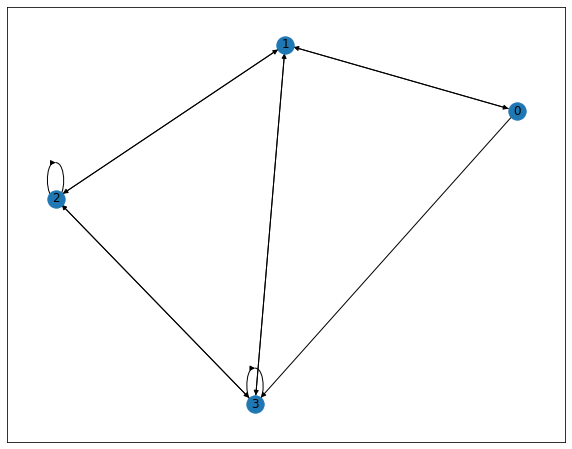

[[ 1 -1 -1 -1]
 [ 0  2  3 -1]
 [ 1  2  3 -1]
 [ 0  1  2  3]]
[[ 0  1  1  1]
 [ 1  0  1  0]
 [-1  0  0  1]
 [-1  1  1  0]
 [-1  0  0  1]
 [-1  0  1  0]
 [-1  0  0  0]
 [-1  1  1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]]


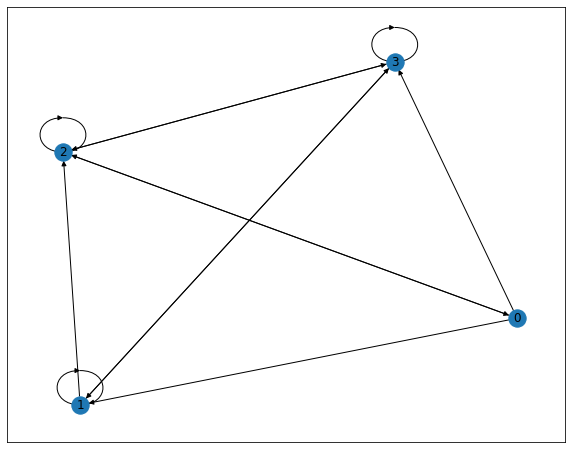

[[ 2 -1 -1 -1]
 [ 0  1  3 -1]
 [ 0  1  2  3]
 [ 0  1  2  3]]
[[ 0  1  1  0]
 [ 1  1  0  0]
 [-1  1  1  0]
 [-1  0  0  0]
 [-1  0  0  0]
 [-1  0  1  1]
 [-1  1  0  0]
 [-1  0  1  1]
 [-1 -1  0  0]
 [-1 -1  0  1]
 [-1 -1  1  1]
 [-1 -1  0  0]
 [-1 -1  1  1]
 [-1 -1  0  0]
 [-1 -1  0  1]
 [-1 -1  0  0]]


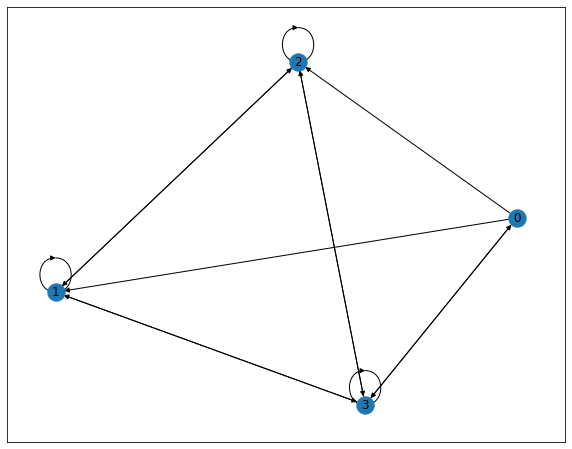

[[ 3 -1 -1 -1]
 [ 0  1  2  3]
 [ 0  1  2  3]
 [ 0  1  2  3]]
[[ 1  1  0  1]
 [ 0  1  0  1]
 [-1  1  0  1]
 [-1  1  0  1]
 [-1  0  0  1]
 [-1  1  0  0]
 [-1  1  0  1]
 [-1  1  0  1]
 [-1  0  1  0]
 [-1  0  0  1]
 [-1  1  0  1]
 [-1  0  1  0]
 [-1  1  0  1]
 [-1  0  1  1]
 [-1  0  0  0]
 [-1  0  0  0]]


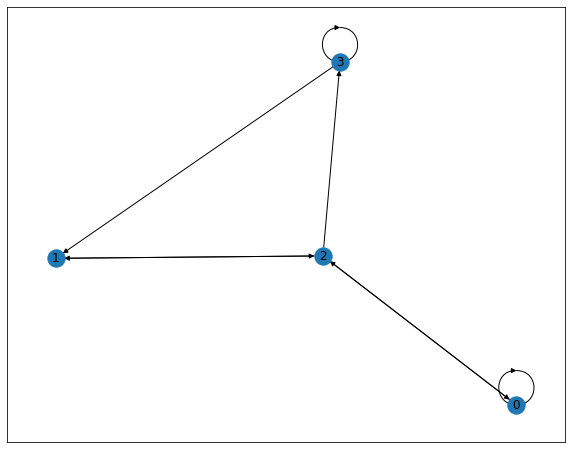

[[0 2]
 [2 3]
 [0 1]
 [2 3]]
[[0 0 1 0]
 [1 1 1 1]
 [1 0 0 0]
 [1 0 1 0]]


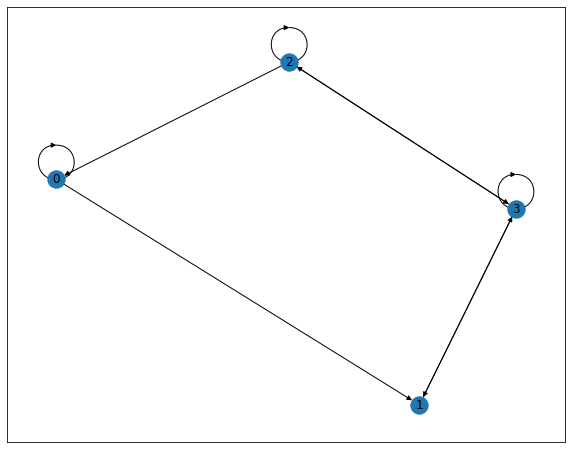

[[ 0  2 -1]
 [ 0  3 -1]
 [ 2  3 -1]
 [ 1  2  3]]
[[ 0  1  1  0]
 [ 1  0  1  0]
 [ 1  0  1  1]
 [ 1  1  0  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]]


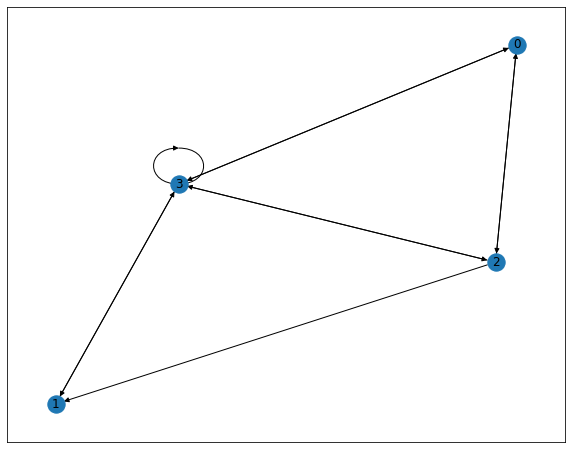

[[ 2  3 -1 -1]
 [ 2  3 -1 -1]
 [ 0  3 -1 -1]
 [ 0  1  2  3]]
[[ 1  1  0  0]
 [ 0  0  1  0]
 [ 0  1  0  1]
 [ 0  1  0  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]]


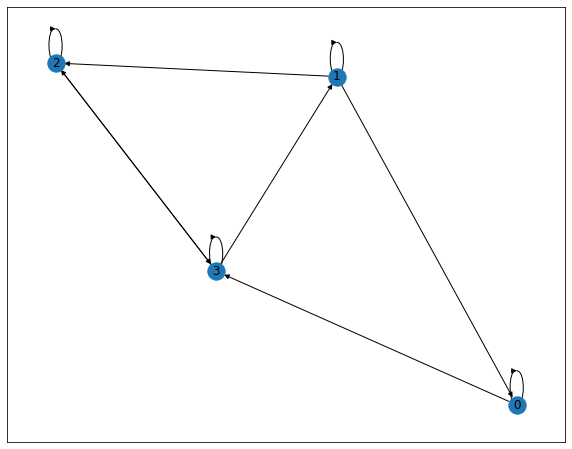

[[ 0  1 -1]
 [ 1  3 -1]
 [ 1  2  3]
 [ 0  2  3]]
[[ 0  1  1  1]
 [ 1  0  0  0]
 [ 0  1  0  0]
 [ 0  1  0  1]
 [-1 -1  1  0]
 [-1 -1  1  1]
 [-1 -1  1  0]
 [-1 -1  1  1]]


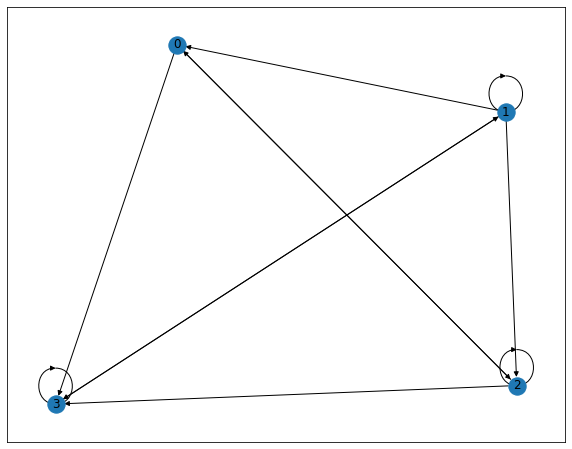

[[ 1  2 -1 -1]
 [ 1  3 -1 -1]
 [ 0  1  2 -1]
 [ 0  1  2  3]]
[[ 0  0  0  0]
 [ 1  1  0  1]
 [ 1  0  1  0]
 [ 0  0  0  0]
 [-1 -1  1  0]
 [-1 -1  1  0]
 [-1 -1  0  1]
 [-1 -1  1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]]


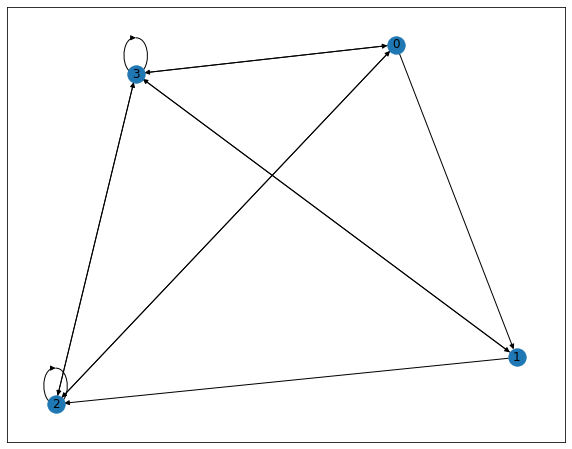

[[ 2  3 -1 -1]
 [ 0  3 -1 -1]
 [ 0  1  2  3]
 [ 0  1  2  3]]
[[ 0  0  0  1]
 [ 0  0  0  0]
 [ 0  1  1  0]
 [ 1  0  0  1]
 [-1 -1  0  0]
 [-1 -1  0  1]
 [-1 -1  0  0]
 [-1 -1  0  1]
 [-1 -1  1  0]
 [-1 -1  0  0]
 [-1 -1  0  1]
 [-1 -1  1  0]
 [-1 -1  0  0]
 [-1 -1  1  0]
 [-1 -1  0  1]
 [-1 -1  0  1]]


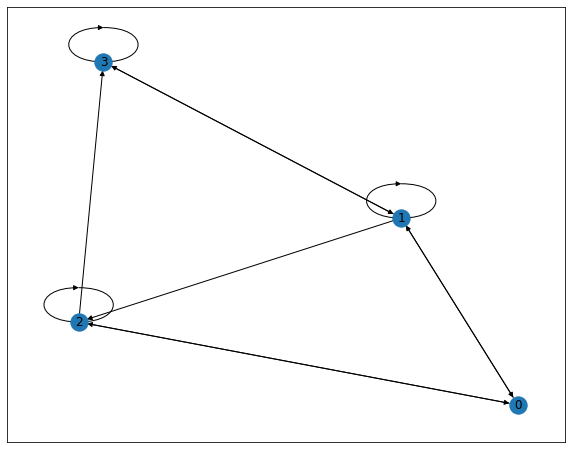

[[ 1  2 -1]
 [ 0  1  3]
 [ 0  1  2]
 [ 1  2  3]]
[[ 0  1  0  0]
 [ 0  1  1  0]
 [ 1  1  1  0]
 [ 0  1  1  1]
 [-1  1  0  1]
 [-1  0  0  1]
 [-1  0  1  0]
 [-1  1  0  0]]


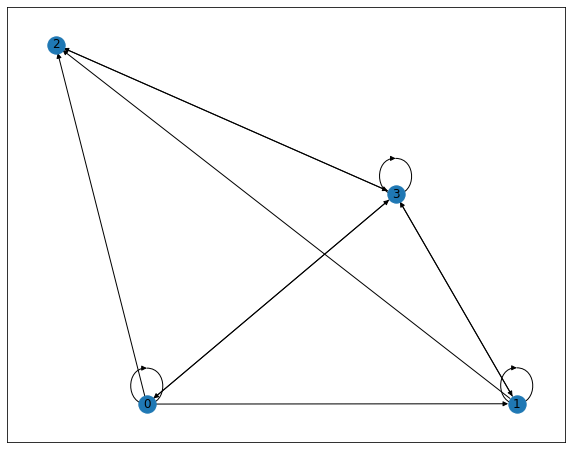

[[ 0  3 -1 -1]
 [ 0  1  3 -1]
 [ 0  1  3 -1]
 [ 0  1  2  3]]
[[ 1  0  0  0]
 [ 0  1  0  1]
 [ 0  0  1  0]
 [ 1  0  1  0]
 [-1  1  0  1]
 [-1  1  1  1]
 [-1  0  0  1]
 [-1  0  0  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]]


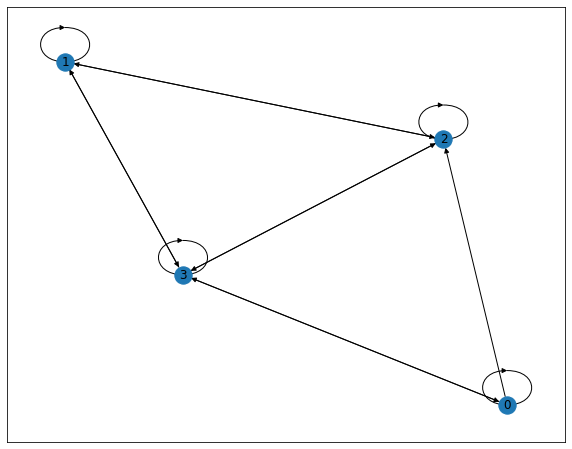

[[ 0  3 -1 -1]
 [ 1  2  3 -1]
 [ 0  1  2  3]
 [ 0  1  2  3]]
[[ 1  0  0  1]
 [ 1  0  0  0]
 [ 1  1  0  1]
 [ 0  0  0  0]
 [-1  0  1  0]
 [-1  1  1  0]
 [-1  1  1  0]
 [-1  1  0  0]
 [-1 -1  1  1]
 [-1 -1  1  0]
 [-1 -1  1  1]
 [-1 -1  0  0]
 [-1 -1  1  1]
 [-1 -1  0  0]
 [-1 -1  0  0]
 [-1 -1  0  1]]


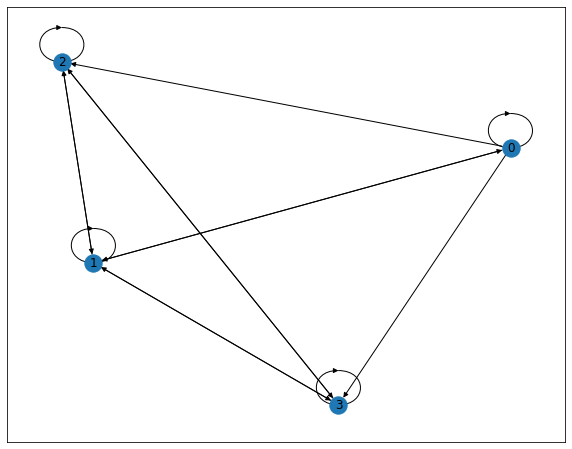

[[ 0  1 -1 -1]
 [ 0  1  2  3]
 [ 0  1  2  3]
 [ 0  1  2  3]]
[[ 0  1  0  1]
 [ 0  1  1  0]
 [ 0  0  1  0]
 [ 1  0  0  0]
 [-1  0  0  1]
 [-1  1  0  1]
 [-1  0  0  0]
 [-1  1  0  0]
 [-1  0  0  1]
 [-1  1  0  0]
 [-1  1  1  1]
 [-1  0  0  0]
 [-1  0  0  0]
 [-1  0  0  1]
 [-1  0  0  0]
 [-1  0  1  0]]


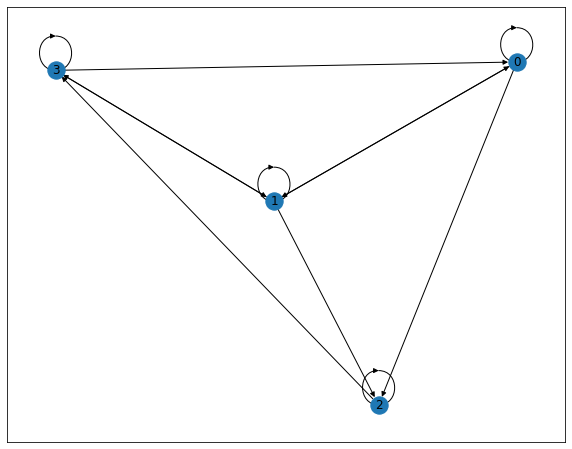

[[0 1 3]
 [0 1 3]
 [0 1 2]
 [1 2 3]]
[[0 0 1 0]
 [1 0 0 1]
 [1 0 1 1]
 [0 0 1 1]
 [0 0 0 1]
 [0 1 0 1]
 [1 1 1 1]
 [1 1 1 1]]


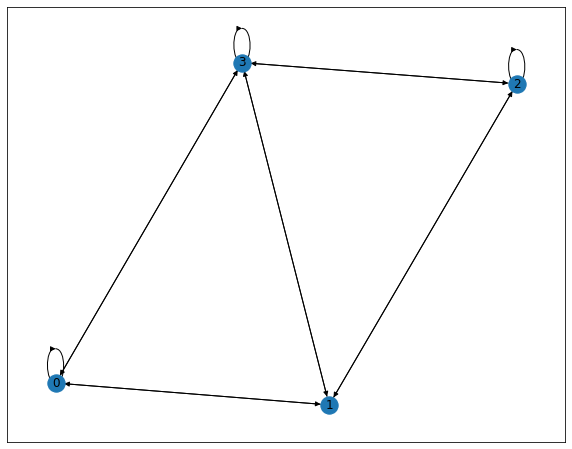

[[ 0  1  3 -1]
 [ 0  2  3 -1]
 [ 1  2  3 -1]
 [ 0  1  2  3]]
[[ 0  1  0  0]
 [ 0  0  1  1]
 [ 0  0  0  0]
 [ 1  1  0  0]
 [ 0  0  1  1]
 [ 0  1  1  0]
 [ 1  0  1  0]
 [ 0  0  0  0]
 [-1 -1 -1  0]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  1]
 [-1 -1 -1  0]
 [-1 -1 -1  0]]


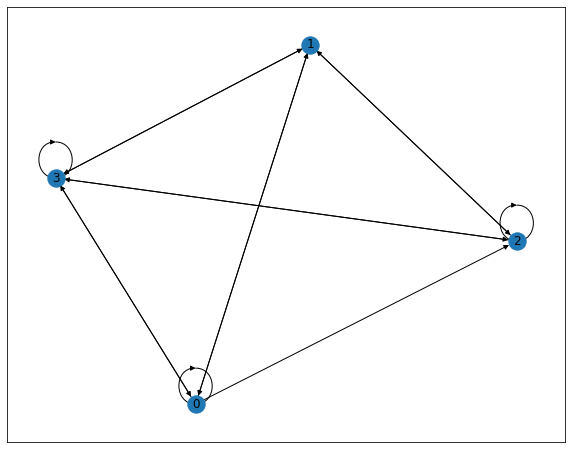

[[ 0  1  3 -1]
 [ 0  2  3 -1]
 [ 0  1  2  3]
 [ 0  1  2  3]]
[[ 0  1  1  1]
 [ 0  0  1  0]
 [ 1  1  1  1]
 [ 0  1  1  1]
 [ 1  1  1  0]
 [ 1  0  1  0]
 [ 0  0  0  1]
 [ 1  0  1  1]
 [-1 -1  0  1]
 [-1 -1  1  0]
 [-1 -1  1  0]
 [-1 -1  0  0]
 [-1 -1  0  0]
 [-1 -1  1  0]
 [-1 -1  1  1]
 [-1 -1  1  0]]


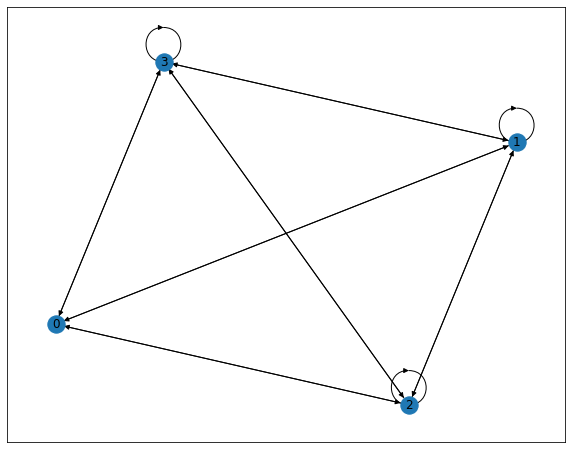

[[ 1  2  3 -1]
 [ 0  1  2  3]
 [ 0  1  2  3]
 [ 0  1  2  3]]
[[ 1  0  0  1]
 [ 1  1  1  1]
 [ 0  1  0  1]
 [ 1  1  1  0]
 [ 0  1  1  0]
 [ 0  0  1  1]
 [ 1  1  0  0]
 [ 1  1  0  0]
 [-1  0  0  1]
 [-1  0  1  0]
 [-1  1  0  0]
 [-1  1  0  1]
 [-1  1  0  1]
 [-1  1  0  0]
 [-1  1  0  1]
 [-1  0  1  1]]


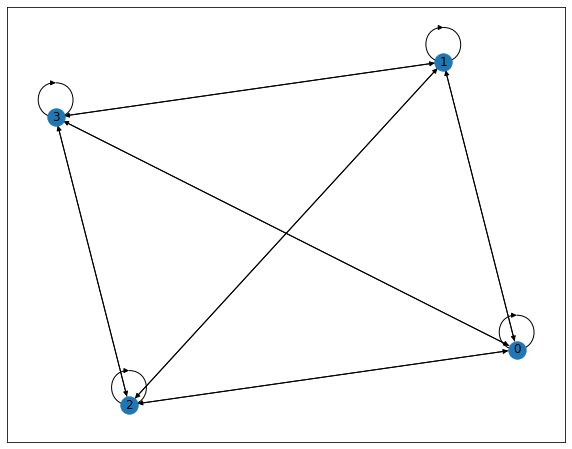

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[1 0 1 0]
 [0 0 1 0]
 [1 1 1 0]
 [0 0 1 1]
 [1 1 0 0]
 [1 1 1 0]
 [1 0 0 0]
 [1 0 1 0]
 [0 1 0 0]
 [0 1 0 1]
 [0 1 0 1]
 [1 1 1 0]
 [1 1 1 1]
 [1 0 0 1]
 [1 1 1 0]
 [1 0 1 1]]


In [3]:
import networkx as nx
import itertools
from boolean_networks.bn import generate_bn

subsets = []
f_vars = [1, 2, 3, 4]
n_genes = 4
for subset in itertools.permutations(f_vars, n_genes):
    subsets.append(subset)

for subset in itertools.combinations_with_replacement(f_vars, n_genes):
    subsets.append(subset)

print(subsets)

multiple_random_bn = []
for subset in subsets:
    random_bn = generate_bn(n_genes, subset)
    multiple_random_bn.append(random_bn)

for bn in multiple_random_bn:
    G = nx.DiGraph()
    edges = [(g2, g1) for g1 in range(bn.n_genes) for g2 in bn.f_vars[g1] if g2 > -1]
    G.add_edges_from(edges)
    fig = plt.figure(figsize=(10,8))

    nx.draw_networkx(G, with_labels=True)
    plt.show()
    print(bn.f_vars)
    print(bn.funcs)


In [6]:
gene_networks = []
for random_bn in multiple_random_bn:
    net = GeneNetwork(random_bn.n_genes, 0.01, random_bn.f_vars, random_bn.funcs)
    print(net.get_steady_state())
    gene_networks.append(net)
    # print(random_bn.funcs)

[0.00961165 0.24620841 0.00253644 0.2416435  0.24393827 0.24866949
 0.00251326 0.00487898]
[9.42427581e-01 1.83907054e-02 9.42094371e-03 3.69655261e-04
 1.03272883e-02 7.37177185e-04 1.81333582e-02 1.93291291e-04]
[0.1779393  0.26423638 0.26766974 0.01068628 0.00446455 0.26943762
 0.00274049 0.00282563]
[0.01285715 0.00655216 0.0064666  0.31862252 0.0033771  0.00333636
 0.32493808 0.32385002]
[0.2685282  0.0920364  0.20939156 0.0030525  0.20793139 0.00303819
 0.21089643 0.00512534]
[0.01100867 0.00340074 0.48074707 0.16546914 0.00184203 0.16393647
 0.00640223 0.16719365]
[0.24509852 0.00490148 0.00490148 0.24509852 0.24509852 0.00490148
 0.00490148 0.24509852]
[0.1249651  0.1250349  0.00374614 0.24625386 0.24034393 0.00965607
 0.00483304 0.24516696]
[5.26331031e-03 4.82146112e-03 1.42433729e-02 2.83089657e-04
 4.85018995e-01 4.89623405e-03 4.80661898e-01 4.81163938e-03]
[9.17197846e-03 9.25373620e-01 5.38528348e-04 2.71390351e-02
 9.35360287e-03 1.86069624e-02 9.18529080e-03 6.30982038

In [179]:
i = 1
for net in gene_networks:
    # print(net.f_vars)
    # print(net.funcs)
    if i > 15:
        print(i)
        print("Regulation power " + str(net.get_reg_power([0,1,2], [1,2], 1, net.get_steady_state())))
        print("Incapacitating power " + str(net.get_incap_power([0,1,2], [1,2], 1, net.get_steady_state())))
    i += 1

16
Regulation power [0.26771177 0.         0.30041645]
Incapacitating power [0.48590511 0.8961795  1.0364337 ]


In [1]:
#determine master and slave genes
from structures import *
import numpy as np

f_vars = np.array([[0, -1, -1, -1, -1],
 [1, 3, -1, -1, -1],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, -1],
 [2, 3, 4, -1, -1]])
 
print(filterMasterGenes(5, f_vars))

NameError: name 'filteringDict' is not defined